## Visualize simulation site texture class
Processed through soils_assigntexture.py

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from palettable.cartocolors.qualitative import Vivid_8

from ideotype.data_process import read_data

In [2]:
#%run '/home/disk/eos8/ach315/ideotype/scripts/soils_assigntexture.py'

In [5]:
df_sims, df_sites, df_wea, df_params, df_all, df_matured = read_data(
    '/home/disk/eos8/ach315/ideotype/ideotype/data/files/filepaths_control_dympd.yml')

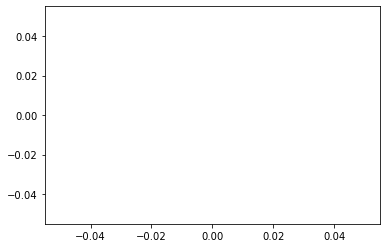

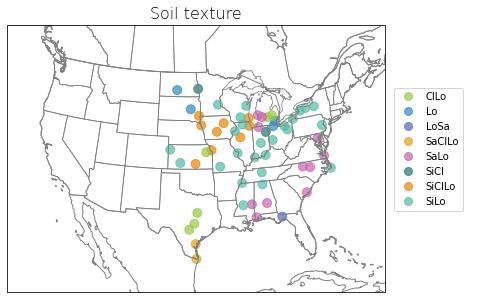

In [46]:
# Set up for legend
colors = [Vivid_8.mpl_colors[3],
          Vivid_8.mpl_colors[7],
          Vivid_8.mpl_colors[1],
          Vivid_8.mpl_colors[6],
          Vivid_8.mpl_colors[4],
          Vivid_8.mpl_colors[5],
          Vivid_8.mpl_colors[0],
          Vivid_8.mpl_colors[2]]

texts = ['ClLo', 'Lo', 'LoSa', 'SaClLo', 
         'SaLo', 'SiCl', 'SiClLo', 'SiLo']
dict_colors = {texture:color for texture, color in zip(texts, colors)}    

patches = [plt.plot([],[], marker='o', ms=8, ls='', alpha=0.7,
                    color=colors[i], label=texts[i])[0] for i in range(len(texts)) ]

# Plot out soil map
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
    central_latitude=39.5, central_longitude=-98.35))
ax.set_extent([-123, -72, 19, 53])

scatter = ax.scatter(df_sites.lon, df_sites.lat,
                     transform=ccrs.PlateCarree(), s=80, alpha=0.7,
                     c=df_sites.texture.map(dict_colors))
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.8)
ax.set_title('Soil texture', fontweight='light', size=16)

fig.legend(handles=patches, loc='right', borderaxespad=1.5)
fig.subplots_adjust(left=0.05, bottom=0, right=0.8, top=1, wspace=0.1, hspace=-0.6)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/soils_sitetexture_simsites.png', format='png', dpi=800)

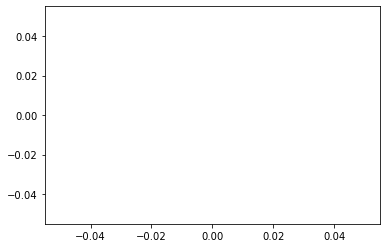

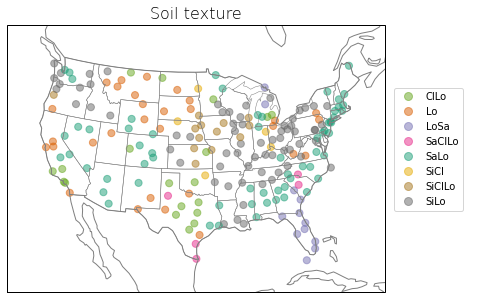

In [4]:
# Set up for legend
colors = ['#66a61e', '#d95f02', '#7570b3', '#e7298a',
          '#1b9e77', '#e6ab02', '#a6761d', '#666666']
texts = ['ClLo', 'Lo', 'LoSa', 'SaClLo', 
         'SaLo', 'SiCl', 'SiClLo', 'SiLo']
dict_colors = {texture:color for texture, color in zip(texts, colors)}    

patches = [plt.plot([],[], marker='o', ms=8, ls='', alpha=0.5,
                    color=colors[i], label=texts[i])[0] for i in range(len(texts)) ]

# Plot out soil map
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1, projection=ccrs.AlbersEqualArea(
    central_latitude=39.5, central_longitude=-98.35))
ax.set_extent([-123, -72, 19, 53])

scatter = ax.scatter(df_sites_copy.lon, df_sites_copy.lat,
                     transform=ccrs.PlateCarree(), s=50, alpha=0.5,
                     c=df_sites_copy.texture.map(dict_colors))
ax.add_feature(cfeature.BORDERS, edgecolor='grey')
ax.add_feature(cfeature.COASTLINE, edgecolor='grey')
ax.add_feature(cfeature.STATES, edgecolor='grey', linewidth=0.5)
ax.set_title('Soil texture', fontweight='light', size=16)

fig.legend(handles=patches, loc='right', borderaxespad=1.5)
fig.subplots_adjust(left=0.05, bottom=0, right=0.8, top=1, wspace=0.1, hspace=-0.6)

#plt.savefig('/home/disk/eos8/ach315/upscale/figs/soils_sitetexture.png', format='png', dpi=800)